In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install ucimlrepo

**importing uci dataset**

In [65]:
from ucimlrepo import fetch_ucirepo

# fetch dataset from UCI
auto_mpg = fetch_ucirepo(id=9)

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

**Get 'data_url' from the output metadata**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

auto_mpg_dataset = pd.read_csv('https://archive.ics.uci.edu/static/public/9/data.csv')

auto_mpg_dataset.head(10)



,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
5,"ford,galaxie,500",8,429.0,198.0,4341,10.0,70,1,15.0
6,"chevrolet,impala",8,454.0,220.0,4354,9.0,70,1,14.0
7,"plymouth,fury,iii",8,440.0,215.0,4312,8.5,70,1,14.0
8,"pontiac,catalina",8,455.0,225.0,4425,10.0,70,1,14.0
9,"amc,ambassador,dpl",8,390.0,190.0,3850,8.5,70,1,15.0


check for null present in the data

In [67]:
auto_mpg_dataset.drop_duplicates()

auto_mpg_dataset.isnull().sum()*100/auto_mpg_dataset.shape[0]

car_name        0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
mpg             0.000000
dtype: float64

Interpolate the 'horsepower' feature

In [85]:
auto_mpg_dataset['horsepower'] = auto_mpg_dataset['horsepower'].interpolate()

print(auto_mpg_dataset.isnull().sum() * 100 / auto_mpg_dataset.shape[0])

car_name        0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model_year      0.0
origin          0.0
mpg             0.0
dtype: float64


check for outliers in the dataset

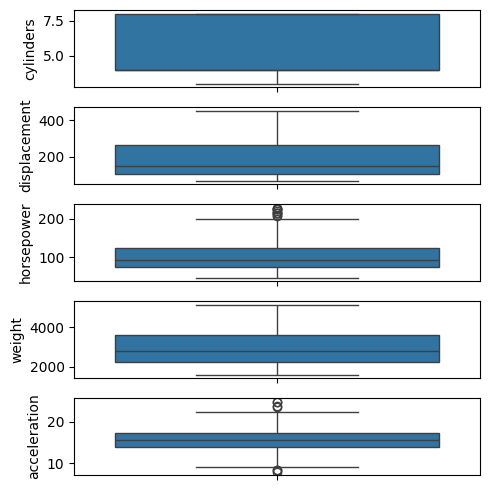

In [86]:
fig, axs = plt.subplots(5, figsize = (5,5))
plt1 = sns.boxplot(auto_mpg_dataset['cylinders'], ax = axs[0])
plt2 = sns.boxplot(auto_mpg_dataset['displacement'], ax = axs[1])
plt3 = sns.boxplot(auto_mpg_dataset['horsepower'], ax = axs[2])
plt4 = sns.boxplot(auto_mpg_dataset['weight'], ax = axs[3])
plt5 = sns.boxplot(auto_mpg_dataset['acceleration'], ax = axs[4])
plt.tight_layout()

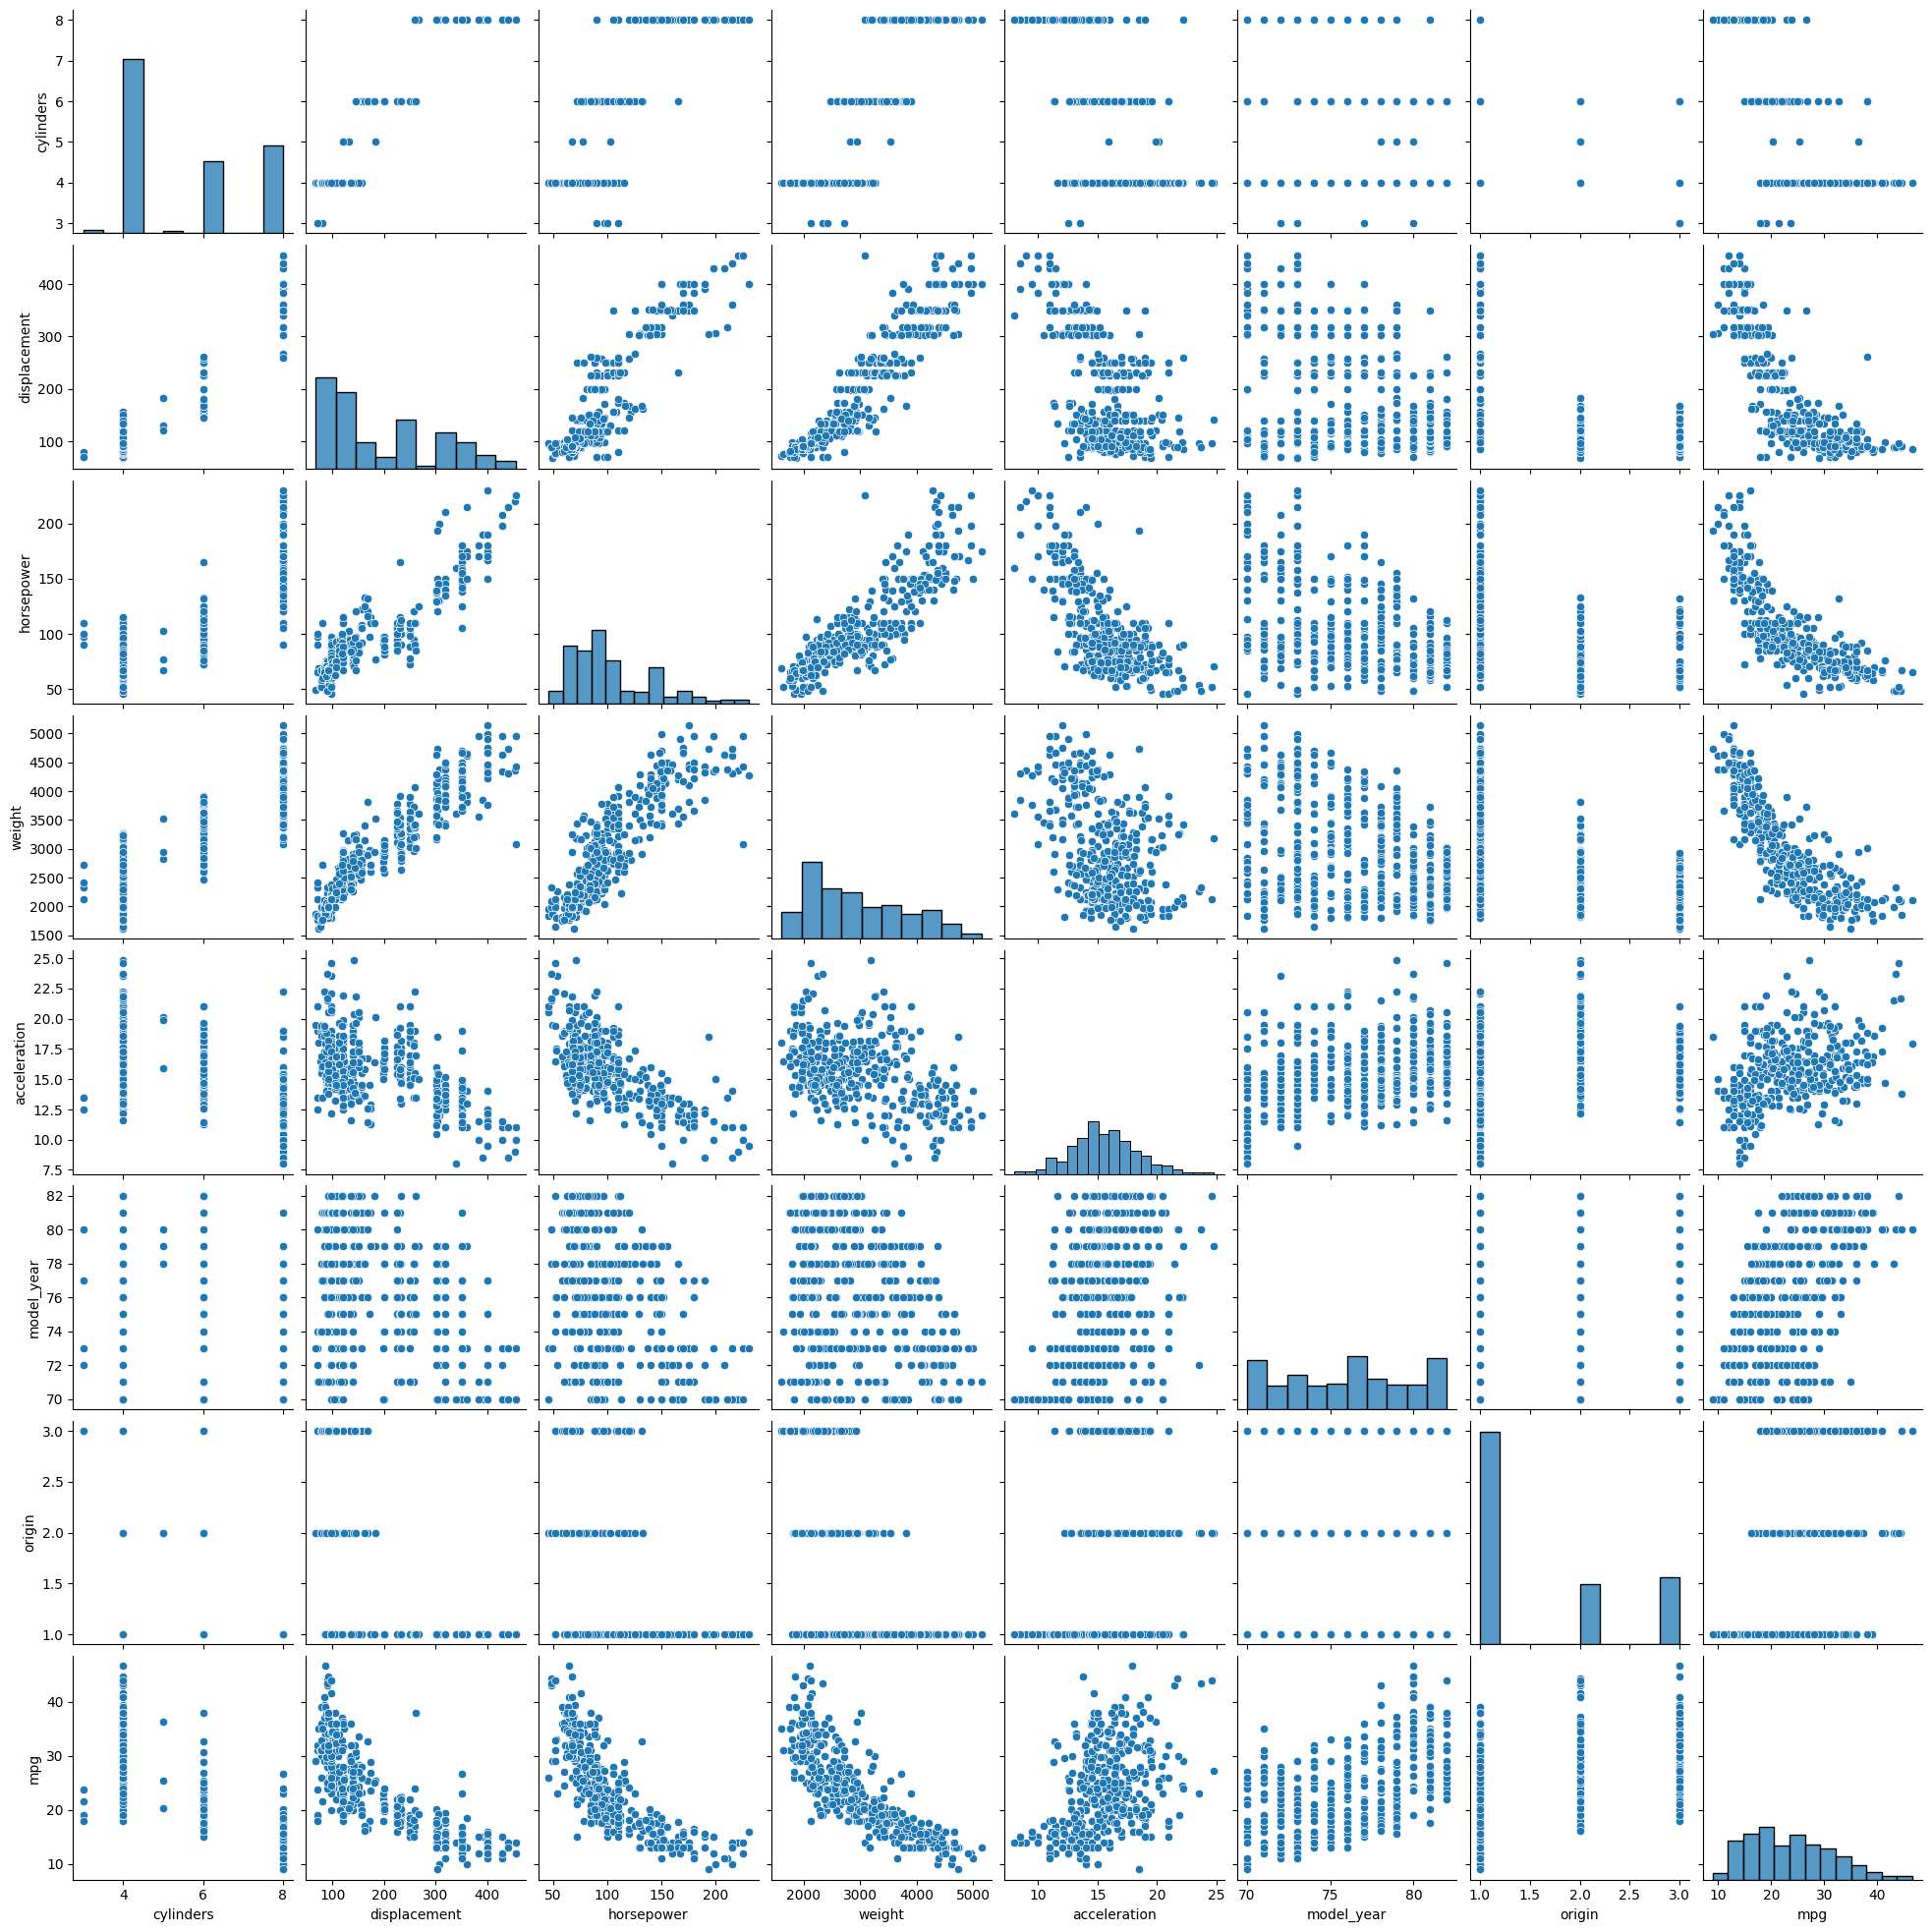

In [87]:
sns.pairplot(auto_mpg_dataset)

**Let's see how 'mpg' are related with other variables using scatter plot.**

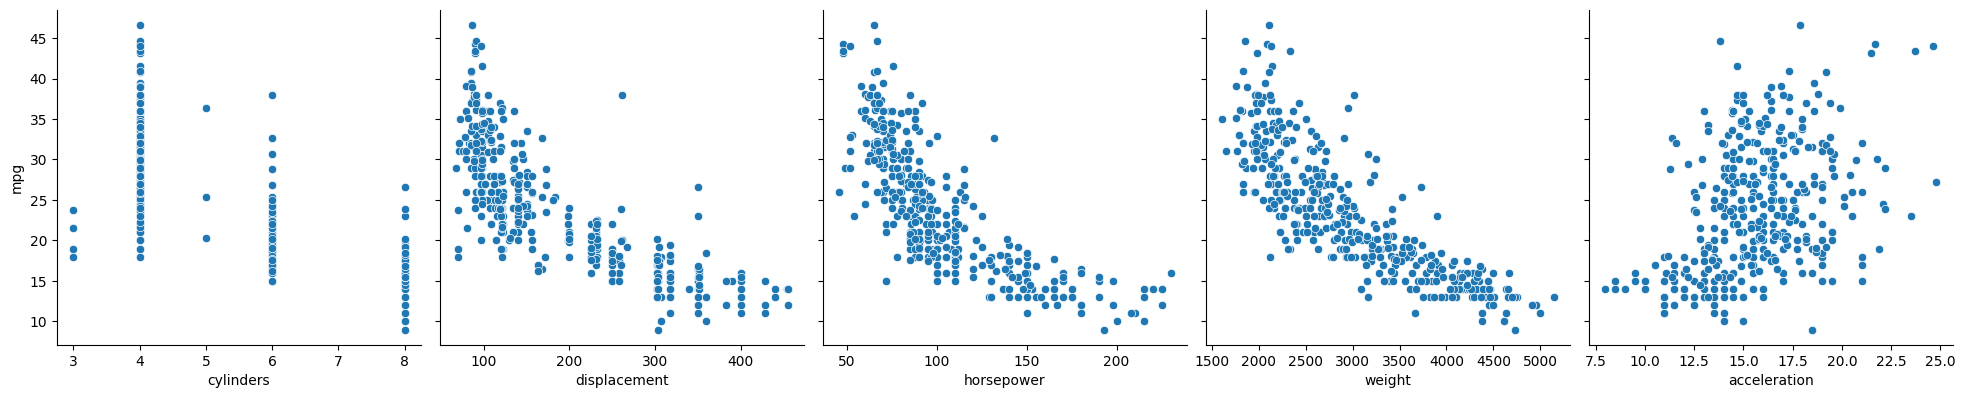

In [88]:
sns.pairplot(auto_mpg_dataset, x_vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], y_vars='mpg', height=4, aspect=1, kind='scatter')
plt.show()

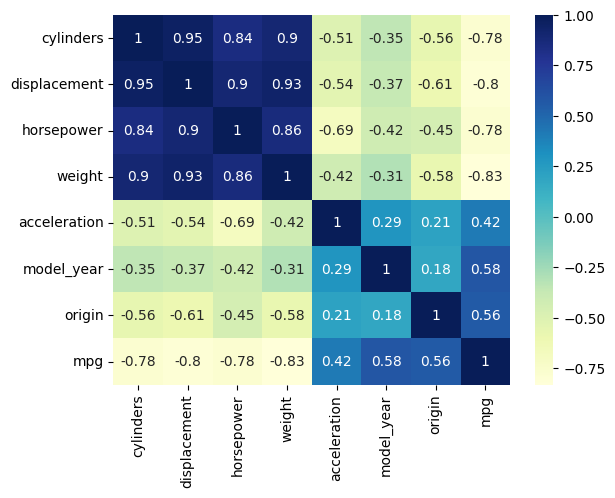

In [89]:
numeric_columns = auto_mpg_dataset.select_dtypes(include='number')

sns.heatmap(numeric_columns.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [90]:
X = auto_mpg_dataset[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = auto_mpg_dataset['mpg']

print(X, y)
X.head()
X.describe()
y.head()
y.describe()

     cylinders  displacement  horsepower  weight  acceleration
0            8         307.0       130.0    3504          12.0
1            8         350.0       165.0    3693          11.5
2            8         318.0       150.0    3436          11.0
3            8         304.0       150.0    3433          12.0
4            8         302.0       140.0    3449          10.5
..         ...           ...         ...     ...           ...
393          4         140.0        86.0    2790          15.6
394          4          97.0        52.0    2130          24.6
395          4         135.0        84.0    2295          11.6
396          4         120.0        79.0    2625          18.6
397          4         119.0        82.0    2720          19.4

[398 rows x 5 columns] 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

**Train**

Perform 80/20 Data split

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

Data Dimension

In [92]:
X_train.shape, y_train.shape

((318, 5), (318,))

In [93]:
X_test.shape, y_test.shape

((80, 5), (80,))

In [94]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration
149,4,120.0,97.0,2489,15.0
118,4,116.0,75.0,2158,15.5
287,8,351.0,138.0,3955,13.2
187,8,305.0,140.0,4215,13.0
190,8,351.0,152.0,4215,12.8


In [95]:
y_train.head()

149    24.0
118    24.0
287    16.5
187    17.5
190    14.5
Name: mpg, dtype: float64

In [96]:
pip install statsmodels

In [97]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()

model.params

const           47.185764
cylinders       -0.340198
displacement    -0.001845
horsepower      -0.051189
weight          -0.004951
acceleration    -0.089291
dtype: float64

Print Model Performance

In [98]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     143.0
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.69e-78
Time:                        11:12:08   Log-Likelihood:                -918.10
No. Observations:                 318   AIC:                             1848.
Df Residuals:                     312   BIC:                             1871.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           47.1858      3.087     15.285   

**Model Evaluation**

In [99]:
y_train_pred = model.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-100-fc3a8a299e4d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


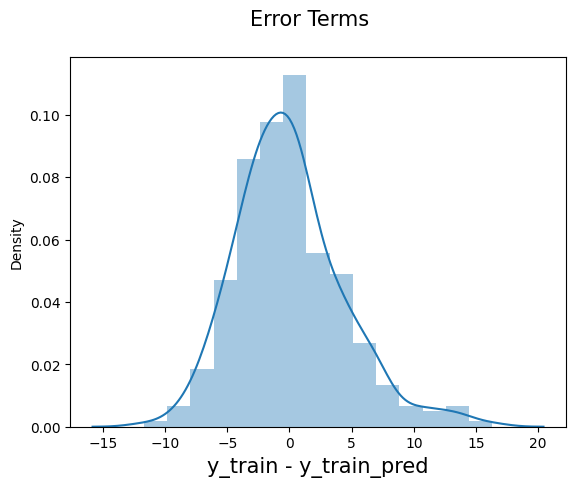

In [100]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

**The residuals are following the normally distributed with a mean 0. All good!**

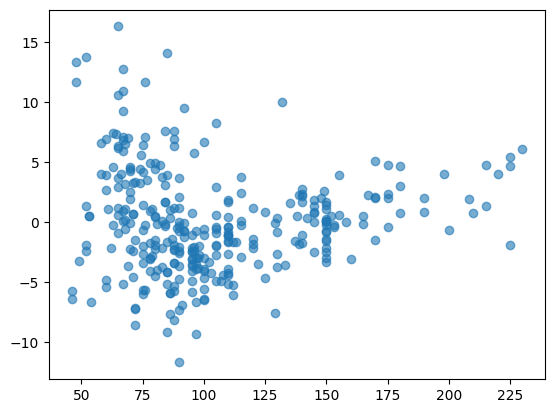

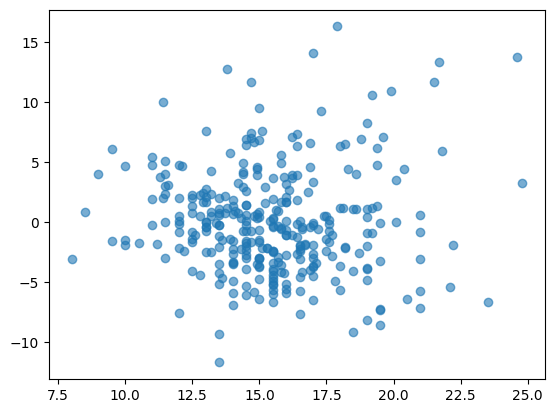

In [110]:
plt.scatter(X_train['horsepower'], res, alpha=0.6)
plt.show()

plt.scatter(X_train['acceleration'], res, alpha=0.6)
plt.show()

**Predictions on the Test Set**

In [102]:
X_test_sm = sm.add_constant(X_test)

y_pred = model.predict(X_test_sm)

In [103]:
y_pred.head()

326    29.525375
54     32.567109
78     24.660321
169    23.742175
368    26.382600
dtype: float64

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

**Returns the mean squared error; take a square root**

In [105]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.7465297300052627

**Checking the R-squared on the test set**

In [106]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7491109212283005

**Visualization on Actual vs Prediction**

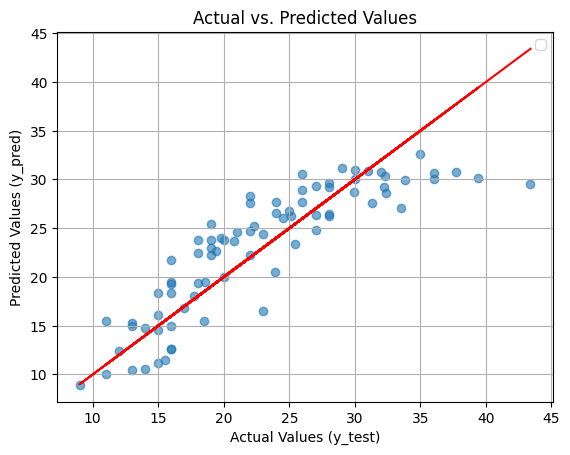

In [113]:
plt.scatter(y_test, y_pred, alpha=0.6)

plt.plot(y_test, y_test, color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
import pickle

pickle.dump(model, open('/content/model_saved','wb'))

In [115]:
model_loaded = pickle.load(open('/content/model_saved', 'rb'))

In [116]:
model_loaded.predict(X_test_sm)

326    29.525375
54     32.567109
78     24.660321
169    23.742175
368    26.382600
         ...    
266    30.020892
69     12.361729
239    30.924504
46     28.262855
50     29.243186
Length: 80, dtype: float64

In [117]:
y_pred = model_loaded.predict(X_test_sm)

result = r2_score(y_test, y_pred)
result


0.7491109212283005